# Capstone Project: Predicting Breast Cancer With Histology Images

## Name: Ana Nguyen
## DTSC 691 Summer: Default Machine Learning Project 

# Goal of Project:

Breast cancer is the second most diagnosed cancer in women, luckly, as technology and research advances death rates are decreasing and survival rates are increasing. Some signs and symptoms of breast cancer may be lumps or unusual thickness in the area and changes in appearance. If these unusual signs are noticed a doctor will then follow up with a mammogram or some type of histology/biopsy screening. After the screening, we can see if the tumor is benign or malignant. If the tumor is benign it means that it is non-cancerous because it will not spread to other parts of the body, however if it is malignant then the tumor is cancerous and can be very deadly. There are many things that can increase the chances of getting breast cancer such as, diet, genetics, and environmental factors. 

The first step to this project is to analyze the data and know what there is to work with. So to start off the project we will use the kaggle dataset, also found on sklearn datasets, that has Breast biopsy results and deeply understand the columns and rows presented. The research question will be if we can use this dataset to predict if the tumor is benign or malignant. We will first transform the data into a dataframe. Then, we will use the see the statistical values as well as check for missing values. It is also important to label the target value and anything else that will be needed later on. We will then have a train and a test set and will get results of how accurate the model was. We will use multiple models in this project and see which one performs the best. 

The goal of this project would be to see how accurate our classification could be. In the long run this can help diagnose patients more accurately and quickly. Doctor visits are very expensive and time consuming so this can be beneficial for a lot of people. Breast cancer can be a very unfortunate diagnosis but the earlier it is caught the more that can be done to stop the growth of the tumor.


# Import the Data/ Data Exploration

In [1]:
import sklearn.datasets

In [2]:
breastcancer_ds = sklearn.datasets.load_breast_cancer()

In [3]:
#Turning Dataset into DataFrame
import pandas as pd
bc_df =pd.DataFrame(breastcancer_ds.data, columns = breastcancer_ds.feature_names)

In [5]:
bc_df["target"] = breastcancer_ds.target

bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
bc_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
#Checking for Null Values
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
#Checking to see the shape of the dataframe
bc_df.shape

(569, 31)

# Multicollinearity  

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

/Users/ananguyen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [11]:
#selecting the variables for the Multicollinearity
variables = bc_df[['mean radius','mean texture', 'mean perimeter', 'mean area','mean smoothness','mean compactness','mean concavity'           
,'mean concave points','mean symmetry','mean fractal dimension','radius error','texture error','perimeter error','area error','smoothness error','compactness error','concavity error','concave points error','symmetry error','fractal dimension error','worst radius','worst texture','worst perimeter','worst area'               ,'worst smoothness'       ,'worst compactness'         
,'worst concave points','worst symmetry','worst fractal dimension']]

In [12]:
variables['Intercept'] = 1

/var/folders/sm/9t5np44965b8p5stm2zb_4lm0000gn/T/ipykernel_81527/1523224820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables['Intercept'] = 1


In [13]:
# VIF
Variance_Inflation_Factor = pd.DataFrame()
Variance_Inflation_Factor["Variables"] = variables.columns
Variance_Inflation_Factor["Variance Inflation Factor"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
Variance_Inflation_Factor

,Variables,Variance Inflation Factor
0,mean radius,3805.855324
1,mean texture,11.872055
2,mean perimeter,3783.906840
3,mean area,344.441828
4,mean smoothness,8.131919
5,mean compactness,48.378558
6,mean concavity,49.327780
7,mean concave points,54.090922
8,mean symmetry,4.217313
9,mean fractal dimension,15.554377


In [14]:
#Dropping all columns that are have a VIF<10
bc_df = bc_df.drop(columns=['worst fractal dimension', 'worst concave points', 'worst compactness','worst smoothness','worst radius',
'worst texture','worst perimeter', 'worst area','compactness error','concavity error','concave points error', 'perimeter error', 'area error', 'mean fractal dimension',
'radius error','mean compactness','mean concavity','mean concave points','mean perimeter','mean radius','mean area' ])

In [15]:
bc_df

,mean texture,mean smoothness,mean symmetry,texture error,smoothness error,symmetry error,fractal dimension error,worst concavity,worst symmetry,target
0,10.38,0.11840,0.2419,0.9053,0.006399,0.03003,0.006193,0.7119,0.4601,0
1,17.77,0.08474,0.1812,0.7339,0.005225,0.01389,0.003532,0.2416,0.2750,0
2,21.25,0.10960,0.2069,0.7869,0.006150,0.02250,0.004571,0.4504,0.3613,0
3,20.38,0.14250,0.2597,1.1560,0.009110,0.05963,0.009208,0.6869,0.6638,0
4,14.34,0.10030,0.1809,0.7813,0.011490,0.01756,0.005115,0.4000,0.2364,0
...,...,...,...,...,...,...,...,...,...,...
564,22.39,0.11100,0.1726,1.2560,0.010300,0.01114,0.004239,0.4107,0.2060,0
565,28.25,0.09780,0.1752,2.4630,0.005769,0.01898,0.002498,0.3215,0.2572,0
566,28.08,0.08455,0.1590,1.0750,0.005903,0.01318,0.003892,0.3403,0.2218,0
567,29.33,0.11780,0.2397,1.5950,0.006522,0.02324,0.006185,0.9387,0.4087,0


# Detecting Outliers For Each of The Variables

<AxesSubplot:xlabel='mean texture'>

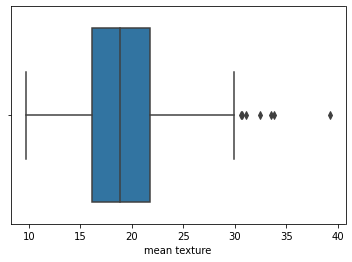

In [16]:
import seaborn as sns
sns.boxplot(x=bc_df['mean texture'])

/Users/ananguyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean texture'>

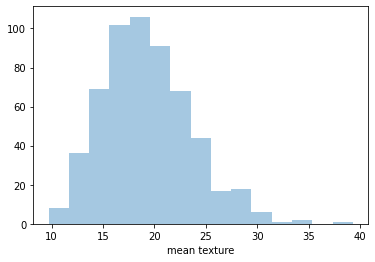

In [17]:
sns.distplot(bc_df['mean texture'], bins = 15, kde = False)

In [18]:
Q1= bc_df['mean texture'].quantile(0.25)

In [19]:
Q3= bc_df['mean texture'].quantile(0.75)

In [20]:
QR_mean = Q3 - Q1
QR_mean

5.629999999999999

In [21]:
Acceptable_Q1 = Q1 - 1.5 * QR_mean
Acceptable_Q1

7.725000000000003

In [22]:
Acceptable_Q3 = Q1 + 1.5 * QR_mean
Acceptable_Q3

24.615000000000002

In [23]:
Remove_outliers_Q1 = (bc_df['mean texture']<Acceptable_Q1)

In [24]:
Remove_outliers_Q3 = (bc_df['mean texture']>Acceptable_Q3)

In [25]:
bc_df['mean texture'][~(Remove_outliers_Q1|Remove_outliers_Q3)]

0      10.38
1      17.77
2      21.25
3      20.38
4      14.34
       ...  
556    19.59
558    22.68
559    23.93
564    22.39
568    24.54
Name: mean texture, Length: 504, dtype: float64

In [26]:
bc_df= bc_df[~(Remove_outliers_Q1|Remove_outliers_Q3)]

In [27]:
bc_df["mean texture"]

0      10.38
1      17.77
2      21.25
3      20.38
4      14.34
       ...  
556    19.59
558    22.68
559    23.93
564    22.39
568    24.54
Name: mean texture, Length: 504, dtype: float64

<AxesSubplot:xlabel='mean texture'>

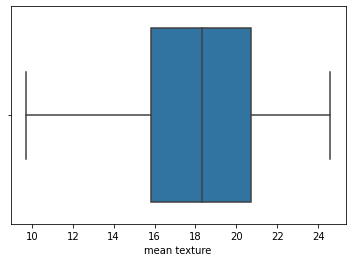

In [28]:
import seaborn as sns
sns.boxplot(x=bc_df['mean texture'])

<AxesSubplot:xlabel='mean smoothness'>

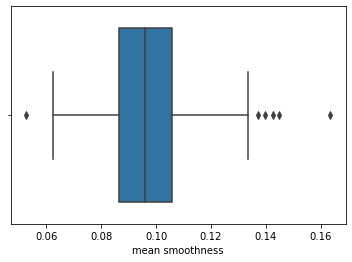

In [29]:
import seaborn as sns
sns.boxplot(x=bc_df['mean smoothness'])

In [30]:
Q1s= bc_df['mean smoothness'].quantile(0.25)

In [31]:
Q3s= bc_df['mean smoothness'].quantile(0.75)

In [32]:
QR_smooth = Q3s - Q1s
QR_smooth

0.01932499999999998

In [33]:
Acceptable_Q1s = Q1s - 1.5 * QR_smooth
Acceptable_Q1s

0.05761250000000004

In [34]:
Acceptable_Q3s = Q3s + 1.5 * QR_smooth
Acceptable_Q3s

0.13491249999999996

In [35]:
Remove_outliers_Q1s = (bc_df['mean smoothness']<Acceptable_Q1s)

In [36]:
Remove_outliers_Q3s = (bc_df['mean smoothness']>Acceptable_Q3s)

In [37]:
bc_df['mean smoothness'][~(Remove_outliers_Q1s|Remove_outliers_Q3s)]

0      0.11840
1      0.08474
2      0.10960
4      0.10030
5      0.12780
        ...   
553    0.09240
556    0.10030
558    0.08473
559    0.09261
564    0.11100
Name: mean smoothness, Length: 498, dtype: float64

In [38]:
bc_df= bc_df[~(Remove_outliers_Q1s|Remove_outliers_Q3s)]

<AxesSubplot:xlabel='mean smoothness'>

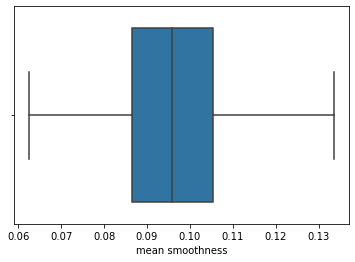

In [39]:
import seaborn as sns
sns.boxplot(x=bc_df['mean smoothness'])

<AxesSubplot:xlabel='mean symmetry'>

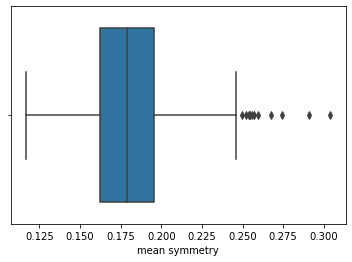

In [40]:
import seaborn as sns
sns.boxplot(x=bc_df['mean symmetry'])

In [41]:
Q1sy= bc_df['mean symmetry'].quantile(0.25)

In [42]:
Q3sy= bc_df['mean symmetry'].quantile(0.75)

In [43]:
QR_symmetry = Q3sy - Q1sy
QR_symmetry

0.03370000000000001

In [44]:
Acceptable_Q1sy = Q1sy - 1.5 * QR_symmetry
Acceptable_Q1sy

0.11145

In [45]:
Acceptable_Q3sy = Q3sy + 1.5 * QR_symmetry
Acceptable_Q3sy

0.24625000000000002

In [46]:
Remove_outliers_Q1sy = (bc_df['mean symmetry']<Acceptable_Q1sy)

In [47]:
Remove_outliers_Q3sy = (bc_df['mean symmetry']>Acceptable_Q3sy)

In [48]:
bc_df['mean symmetry'][~(Remove_outliers_Q1sy|Remove_outliers_Q3sy)]

0      0.2419
1      0.1812
2      0.2069
4      0.1809
5      0.2087
        ...  
553    0.1692
556    0.1791
558    0.1454
559    0.1388
564    0.1726
Name: mean symmetry, Length: 486, dtype: float64

In [49]:
bc_df= bc_df[~(Remove_outliers_Q1sy|Remove_outliers_Q3sy)]

<AxesSubplot:xlabel='mean symmetry'>

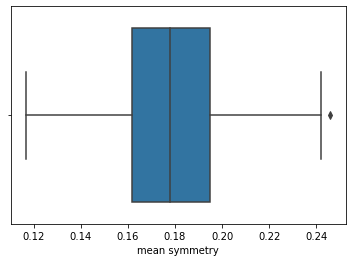

In [50]:
import seaborn as sns
sns.boxplot(x=bc_df['mean symmetry'])

<AxesSubplot:xlabel='texture error'>

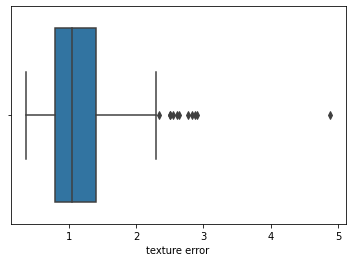

In [51]:
import seaborn as sns
sns.boxplot(x=bc_df['texture error'])

In [52]:
Q1t= bc_df['texture error'].quantile(0.25)

In [53]:
Q3t= bc_df['texture error'].quantile(0.75)

In [54]:
QR_texture = Q3t - Q1t
QR_texture

0.60605

In [55]:
Acceptable_Q1t = Q1t - 1.5 * QR_texture
Acceptable_Q1t

-0.10912500000000003

In [56]:
Acceptable_Q3t = Q3t + 1.5 * QR_texture
Acceptable_Q3t

2.3150749999999998

In [57]:
Remove_outliers_Q1t = (bc_df['texture error']<Acceptable_Q1t)

In [58]:
Remove_outliers_Q3t = (bc_df['texture error']>Acceptable_Q3t)

In [59]:
bc_df['texture error'][~(Remove_outliers_Q1t|Remove_outliers_Q3t)]

0      0.9053
1      0.7339
2      0.7869
4      0.7813
5      0.8902
        ...  
551    1.4670
553    1.8790
556    2.0900
558    1.1080
564    1.2560
Name: texture error, Length: 475, dtype: float64

In [60]:
bc_df= bc_df[~(Remove_outliers_Q1t|Remove_outliers_Q3t)]

<AxesSubplot:xlabel='texture error'>

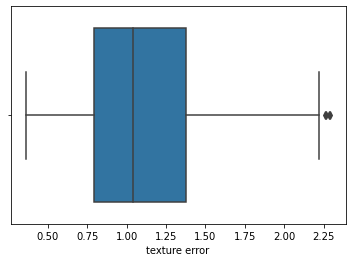

In [61]:
import seaborn as sns
sns.boxplot(x=bc_df['texture error'])

<AxesSubplot:xlabel='smoothness error'>

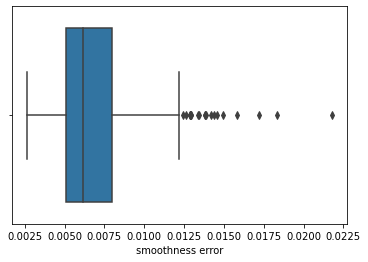

In [62]:
import seaborn as sns
sns.boxplot(x=bc_df['smoothness error'])

In [63]:
Q1se= bc_df['smoothness error'].quantile(0.25)

In [64]:
Q3se= bc_df['smoothness error'].quantile(0.75)

In [65]:
QR_smooth_error = Q3se - Q1se
QR_smooth_error

0.0029065000000000002

In [66]:
Acceptable_Q1se = Q1se - 1.5 * QR_smooth_error
Acceptable_Q1se

0.0007202499999999995

In [67]:
Acceptable_Q3se = Q3se + 1.5 * QR_smooth_error
Acceptable_Q3se

0.012346250000000001

In [68]:
Remove_outliers_Q1se = (bc_df['smoothness error']<Acceptable_Q1se)

In [69]:
Remove_outliers_Q3se = (bc_df['smoothness error']>Acceptable_Q3se)

In [70]:
bc_df['smoothness error'][~(Remove_outliers_Q1se|Remove_outliers_Q3se)]

0      0.006399
1      0.005225
2      0.006150
4      0.011490
5      0.007510
         ...   
550    0.009579
551    0.003495
553    0.010940
558    0.004242
564    0.010300
Name: smoothness error, Length: 455, dtype: float64

In [71]:
bc_df= bc_df[~(Remove_outliers_Q1se|Remove_outliers_Q3se)]

<AxesSubplot:xlabel='smoothness error'>

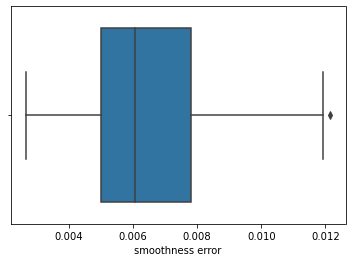

In [72]:
import seaborn as sns
sns.boxplot(x=bc_df['smoothness error'])

<AxesSubplot:xlabel='symmetry error'>

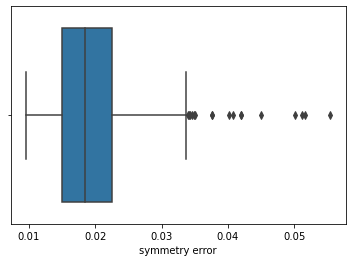

In [73]:
import seaborn as sns
sns.boxplot(x=bc_df['symmetry error'])

In [74]:
Q1sy_e= bc_df['symmetry error'].quantile(0.25)

In [75]:
Q3sy_e= bc_df['symmetry error'].quantile(0.75)

In [76]:
QR_symmetry_error = Q3sy_e - Q1sy_e
QR_symmetry_error

0.007574999999999998

In [77]:
Acceptable_Q1sy_e = Q1sy_e - 1.5 * QR_symmetry_error
Acceptable_Q1sy_e

0.0035825000000000023

In [78]:
Acceptable_Q3sy_e = Q3sy_e + 1.5 * QR_symmetry_error
Acceptable_Q3sy_e

0.033882499999999996

In [79]:
Remove_outliers_Q1sy_e = (bc_df['symmetry error']<Acceptable_Q1sy_e)

In [80]:
Remove_outliers_Q3sy_e = (bc_df['symmetry error']>Acceptable_Q3sy_e)

In [81]:
bc_df['symmetry error'][~(Remove_outliers_Q1sy_e|Remove_outliers_Q3sy_e)]

0      0.03003
1      0.01389
2      0.02250
4      0.01756
5      0.02165
        ...   
549    0.02466
550    0.03004
551    0.02912
558    0.01638
564    0.01114
Name: symmetry error, Length: 438, dtype: float64

In [82]:
bc_df= bc_df[~(Remove_outliers_Q1sy_e|Remove_outliers_Q3sy_e)]

<AxesSubplot:xlabel='symmetry error'>

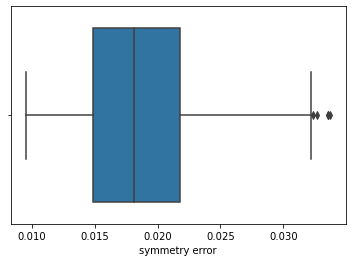

In [83]:
import seaborn as sns
sns.boxplot(x=bc_df['symmetry error'])

<AxesSubplot:xlabel='fractal dimension error'>

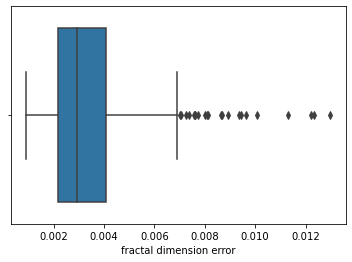

In [84]:
import seaborn as sns
sns.boxplot(x=bc_df['fractal dimension error'])

In [85]:
Q1f= bc_df['fractal dimension error'].quantile(0.25)

In [86]:
Q3f= bc_df['fractal dimension error'].quantile(0.75)

In [87]:
QR_fractal = Q3f - Q1f
QR_fractal

0.0019017499999999998

In [88]:
Acceptable_Q1f = Q1f - 1.5 * QR_fractal
Acceptable_Q1f

-0.0006928749999999995

In [89]:
Acceptable_Q3f = Q3f + 1.5 * QR_fractal
Acceptable_Q3f

0.006914125

In [90]:
Remove_outliers_Q1f = (bc_df['fractal dimension error']<Acceptable_Q1f)

In [91]:
Remove_outliers_Q3f = (bc_df['fractal dimension error']>Acceptable_Q3f)

In [92]:
bc_df['fractal dimension error'][~(Remove_outliers_Q1f|Remove_outliers_Q3f)]

0      0.006193
1      0.003532
2      0.004571
4      0.005115
5      0.005082
         ...   
549    0.002977
550    0.002228
551    0.004723
558    0.004406
564    0.004239
Name: fractal dimension error, Length: 416, dtype: float64

In [93]:
bc_df= bc_df[~(Remove_outliers_Q1f|Remove_outliers_Q3f)]

<AxesSubplot:xlabel='fractal dimension error'>

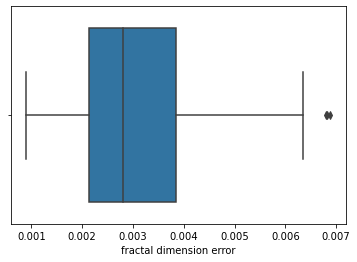

In [94]:
import seaborn as sns
sns.boxplot(x=bc_df['fractal dimension error'])

<AxesSubplot:xlabel='worst concavity'>

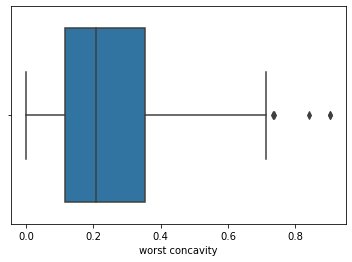

In [95]:
import seaborn as sns
sns.boxplot(x=bc_df['worst concavity'])

In [96]:
Q1c= bc_df['worst concavity'].quantile(0.25)

In [97]:
Q3c= bc_df['worst concavity'].quantile(0.75)

In [98]:
QR_concavity = Q3c - Q1c
QR_concavity

0.238275

In [99]:
Acceptable_Q1c = Q1c - 1.5 * QR_concavity
Acceptable_Q1c

-0.24078749999999996

In [100]:
Acceptable_Q3c = Q3c + 1.5 * QR_concavity
Acceptable_Q3c

0.7123124999999999

In [101]:
Remove_outliers_Q1c = (bc_df['worst concavity']<Acceptable_Q1c)

In [102]:
Remove_outliers_Q3c = (bc_df['worst concavity']>Acceptable_Q3c)

In [103]:
bc_df['worst concavity'][~(Remove_outliers_Q1c|Remove_outliers_Q3c)]


0      0.71190
1      0.24160
2      0.45040
4      0.40000
5      0.53550
        ...   
549    0.06194
550    0.00000
551    0.15640
558    0.36620
564    0.41070
Name: worst concavity, Length: 411, dtype: float64

In [104]:
bc_df= bc_df[~(Remove_outliers_Q1c|Remove_outliers_Q3c)]


<AxesSubplot:xlabel='worst concavity'>

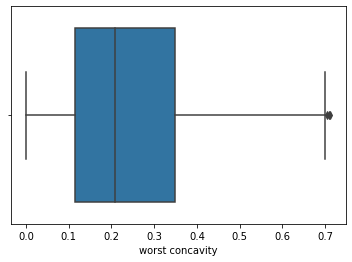

In [105]:
import seaborn as sns
sns.boxplot(x=bc_df['worst concavity'])

<AxesSubplot:xlabel='worst symmetry'>

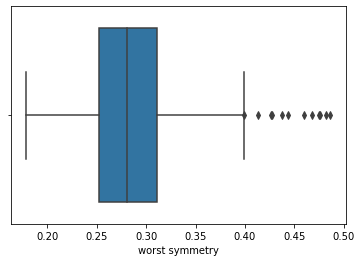

In [106]:
import seaborn as sns
sns.boxplot(x=bc_df['worst symmetry'])

In [107]:
Q1w= bc_df['worst symmetry'].quantile(0.25)

In [108]:
Q3w= bc_df['worst symmetry'].quantile(0.75)

In [109]:
QR_symmetry = Q3w- Q1w
QR_symmetry

0.058550000000000046

In [110]:
Acceptable_Q1w = Q1w - 1.5 * QR_symmetry
Acceptable_Q1w

0.16477499999999992

In [111]:
Acceptable_Q3w = Q3w + 1.5 * QR_symmetry
Acceptable_Q3w

0.3989750000000001

In [112]:
Remove_outliers_Q1w = (bc_df['worst symmetry']<Acceptable_Q1w)

In [113]:
Remove_outliers_Q3w = (bc_df['worst symmetry']>Acceptable_Q3w)

In [114]:
bc_df['worst symmetry'][~(Remove_outliers_Q1w|Remove_outliers_Q3w)]

1      0.2750
2      0.3613
4      0.2364
5      0.3985
6      0.3063
        ...  
549    0.3059
550    0.2458
551    0.3169
558    0.2258
564    0.2060
Name: worst symmetry, Length: 399, dtype: float64

In [115]:
bc_df= bc_df[~(Remove_outliers_Q1w|Remove_outliers_Q3w)]

<AxesSubplot:xlabel='worst symmetry'>

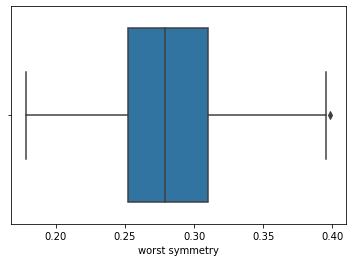

In [116]:
import seaborn as sns
sns.boxplot(x=bc_df['worst symmetry'])

# Preparing to Train the Model and using cross_val_score

In [120]:
bc_df['target']

1      0
2      0
4      0
5      0
6      0
      ..
549    1
550    1
551    1
558    1
564    0
Name: target, Length: 399, dtype: int64

In [121]:
#Creating X and Y columns 
X = bc_df.drop(columns='target', axis=1)
Y = bc_df['target']

In [185]:
# Using cross_val_score to get an accuracy score
from sklearn.model_selection import cross_val_score
Scores_Cross = cross_val_score(modelLogistic, X,Y,cv=5)
Scores_Cross

array([0.875     , 0.85      , 0.8875    , 0.8375    , 0.84810127])

In [187]:
print("Accuracy: %0.3f (+/- %0.3f) " % (Scores_Cross.mean(), Scores_Cross.std() * 2))

Accuracy: 0.860 (+/- 0.037) 


In [122]:
#Splitting the Data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=2)

In [123]:
#Checking the shape of X_train
X_train.shape

(339, 9)

In [124]:
#Checking the shape of X_test
X_test.shape

(60, 9)

In [125]:
#using a logistic regrssion 
from sklearn.linear_model import LogisticRegression
modelLogistic = LogisticRegression()

In [126]:
modelLogistic.fit(X_train, Y_train)

LogisticRegression()

In [127]:
#Getting the recall and acccuracy score for the training data
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
Xtrain_pred = modelLogistic.predict(X_train)

In [128]:
accuracy_score_Logistic = accuracy_score(Y_train, Xtrain_pred)

In [129]:
recall_score_Logistic = recall_score(Y_train, Xtrain_pred)

In [130]:
print('The accuracy for the training data is = ', accuracy_score_Logistic)

The accuracy for the training data is =  0.8643067846607669


In [131]:
print('The recall score for the training data is = ',recall_score_Logistic)

The recall score for the training data is =  0.922077922077922


In [133]:
#Getting the acccuracy score and recall score for the test data
Xtest_pred = modelLogistic.predict(X_test)

In [134]:
accuracy_score_Logistic_test = accuracy_score(Y_test, Xtest_pred)

In [135]:
recall_score_Logistic_test = recall_score(Y_test, Xtest_pred)

In [136]:
print('The accuracy for the test data is = ', accuracy_score_Logistic_test)

The accuracy for the test data is =  0.8


In [137]:
print('The recall score for the test data is = ',recall_score_Logistic_test)

The recall score for the test data is =  0.9473684210526315


In [138]:
#using the Kneighbor classifier 
from sklearn.neighbors import KNeighborsClassifier
model_kn = KNeighborsClassifier()

In [139]:
model_kn.fit(X_train, Y_train)

KNeighborsClassifier()

In [140]:
Xtrain_pred_kn = model_kn.predict(X_train)

In [141]:
#Getting the recall and acccuracy score for the training data
accuracy_score_KNeighbors = accuracy_score(Y_train, Xtrain_pred_kn)

In [142]:
recall_score_KNeighbors = recall_score(Y_train, Xtrain_pred_kn)

In [143]:
print('The accuracy for the training data is = ', accuracy_score_KNeighbors)

The accuracy for the training data is =  0.8790560471976401


In [144]:
print('The recall score for the training data is = ', recall_score_KNeighbors)

The recall score for the training data is =  0.935064935064935


In [145]:
#Getting the acccuracy score for the test data
Xtest_pred = model_kn.predict(X_test)

In [146]:
accuracy_score_KNeighbors_test = accuracy_score(Y_test, Xtest_pred)

In [147]:
recall_score_KNeighbors_test = recall_score(Y_test, Xtest_pred)

In [148]:
print('The accuracy for the test data is = ', accuracy_score_KNeighbors_test)

The accuracy for the test data is =  0.7166666666666667


In [149]:
print('The recall score for the test data is = ', recall_score_KNeighbors)

The recall score for the test data is =  0.935064935064935


In [163]:
#Getting the recall and acccuracy score for the training data
from sklearn.tree import DecisionTreeClassifier
model_decision= DecisionTreeClassifier()
model_decision.fit(X_train, Y_train)

DecisionTreeClassifier()

In [164]:
Xtrain_pred_decision = model_decision.predict(X_train)

In [165]:
accuracy_score_decision = accuracy_score(Y_train, Xtrain_pred_decision)

In [166]:
recall_score_decision = recall_score(Y_train, Xtrain_pred_decision)

In [167]:
print('The accuracy for the training data is = ', accuracy_score_decision)

The accuracy for the training data is =  1.0


In [168]:
print('The recall for the training data is = ', recall_score_decision)

The recall for the training data is =  1.0


In [169]:
#Getting the acccuracy score for the test data
Xtest_pred = model_decision.predict(X_test)

In [170]:
accuracy_score_decision_test = accuracy_score(Y_test, Xtest_pred)

In [171]:
recall_score_decision_test = recall_score(Y_test, Xtest_pred)

In [172]:
print('The accuracy for the test data is = ', accuracy_score_decision_test)

The accuracy for the test data is =  0.75


In [173]:
print('The recall for the test data is = ', recall_score_decision_test)

The recall for the test data is =  0.8421052631578947


In [174]:
from sklearn.dummy import DummyClassifier

In [175]:
Baseline_model = DummyClassifier(strategy='most_frequent').fit(X_train, Y_train)

In [176]:
Baseline_model.score(X_test,Y_test)

0.6333333333333333

In [178]:
#Performing a Gridsearch on Logistic regression
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty': ['l1', 'l2'],'C':[0.001, 0.9, 0.01, 10, 25, 40, 60, 80, 100]}
            
grid_search_cv = GridSearchCV(LogisticRegression(), param_grid, cv=10, scoring='accuracy')
grid_search_cv.fit(X_train, Y_train)
grid_search_cv.best_params_

/Users/ananguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ananguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

{'C': 40, 'penalty': 'l2'}

In [179]:
#Performing a Gridsearch on Logistic regression
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty': ['l2'],'C':[10, 25, 40, 60, 80]}
            
grid_search_cv = GridSearchCV(LogisticRegression(), param_grid, cv=10, scoring='accuracy')
grid_search_cv.fit(X_train, Y_train)
grid_search_cv.best_params_

/Users/ananguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ananguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

{'C': 40, 'penalty': 'l2'}

In [180]:
accuracy = grid_search_cv.best_score_ *100
print("Accuracy : {:.2f}%".format(accuracy) )

Accuracy : 89.95%


In [181]:
model = LogisticRegression(penalty='l2',C=40,)

In [182]:
model.fit(X_train, Y_train)

LogisticRegression(C=40)

In [183]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [184]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

model = pickle.load(open('model.pkl', 'rb'))
print(model)

LogisticRegression(C=40)
